# Calculating Cumulative Impact Probability Difference Distribution Between NASA and ESA

Written by Aria Soh @ University of Washington | rsoh@uw.edu <br>
Winter Quarter 2025-2026 ASTR 302 | Project NEO


Calculating the cumulative impact probability difference (relative as a percent) and analyzing the distribution of differences against various parameters

**History:** <br>
2026-02-10: Created file, graphed histogram of probability differences <br>
2026-02-17: Added Hess plot of relative differences vs maximum cum IP <br>
2026-02-18: Updated to fit new data from Jackey Fang <br>
2026-02-19: Changed Hess plot to scatterplot, implemented better scaling, plotted ratios and sliced for high disagreements
2026-02-24: Added v inf vs cumulative ip ratio plots for different max cum ip ranges
2026-02-26: Color-coded the plots based on who has the max cum ip, added more plots for lower probabilities

In [1]:
# Matplotlib to plot a distribution of cumulative probabilities
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib.colors import ListedColormap

# Astropy to read the data and put it in a QTable
import astropy.units as u
from astropy.table import QTable
from astropy.table import join

# Np for data manipulation (np.vectorize etc.)
import numpy as np

In [2]:
# Reading csv file for NASA's data
nasa_table = QTable.read('./nasa_ipcum.ecsv', 
                         format='ascii.ecsv',
                         delimiter = ' ')
nasa_table[0:3]

last_obs,v_inf,ps_max,fullname,ip,des,h,range,last_obs_jd,n_imp,ps_cum,ts_max,diameter,id
str15,str17,str6,str24,str20,str10,str5,str9,str12,int64,str6,object,str7,str8
1979-12-15,23.7606234552547,-2.99,(1979 XB),8.515158e-07,1979 XB,18.54,2056-2113,2444222.5,4,-2.69,0,0.66,bJ79X00B
2022-05-23,15.5694051293592,-5.79,(2022 KK2),0.0001203297828,2022 KK2,28.45,2060-2122,2459722.5,33,-5.59,0,0.0069,bK22K02K
2000-10-03,1.35802744453748,-3.11,(2000 SG344),0.002743395186,2000 SG344,24.79,2069-2122,2451820.5,300,-2.77,0,0.037,bK00SY4G


In [3]:
# Checking to see that all of the data from Nasa successfully got loaded
len(nasa_table)

2067

In [4]:
# Reading csv file for ESA's data
esa_table = QTable.read('./esa_ipcum.ecsv', 
                         format='ascii.ecsv',
                         delimiter = ' ')
esa_table[0:3]

object_name,diameter_m,estimated_flag,vi_max_date,ip_max,ps_max,ts,vel_km_s,years,ip_cum,ps_cum
str26,str4,str1,str16,str8,str6,str1,str5,str9,str8,str6
2023VD3,14,*,2034-11-08 17:08,2.35E-3,-2.67,0,21.01,2034-2039,2.35E-3,-2.67
2008JL3,30,*,2027-05-01 09:05,1.49E-4,-2.73,0,14.01,2027-2122,1.61E-4,-2.73
1979XB,500,*,2056-12-12 21:38,2.34E-7,-2.82,0,27.54,2056-2113,7.34E-7,-2.70


In [5]:
# Checking to see that all of the data from Esa successfully got loaded
len(esa_table)

1908

In [6]:
# Renaming the columns of each table so the the object designation matches (so it can be used as a key) and the cumulative probs specify the dataset
nasa_table.rename_columns(['ip', 'des'], ['IP cum NASA', 'Object Designation'])
esa_table.rename_columns([ 'ip_cum', 'object_name'], ['IP cum ESA', 'Object Designation'])

In [7]:
def to_floats(string_column):
    return float(string_column)

In [8]:
vto_floats = np.vectorize(to_floats)

In [9]:
nasa_table['IP cum NASA'] = vto_floats(nasa_table['IP cum NASA'])
nasa_table['v_inf'] = vto_floats(nasa_table['v_inf'])
esa_table['IP cum ESA'] = vto_floats(esa_table['IP cum ESA'])

In [10]:
# Creating a subset of NASA's data with just designation (key) and cumulative probabilities and velocity at infinity v_inf (values)
asteroid_list_nasa = nasa_table['Object Designation',  'v_inf', 'IP cum NASA']
asteroid_list_nasa[0:4]

Object Designation,v_inf,IP cum NASA
str10,float64,float64
1979 XB,23.7606234552547,8.515158e-07
2022 KK2,15.5694051293592,0.0001203297828
2000 SG344,1.35802744453748,0.002743395186
2012 VS76,11.4626328606267,1.9442009e-05


In [11]:
# The designations for ESA have no spaces, so need to remove them from NASA's data
def remove_spaces(array_w_spaces):
        return array_w_spaces.replace(" ","")

In [12]:
# Vectorizing the function so that it can apply to every entry in the designation column
vremove_spaces = np.vectorize(remove_spaces)

In [13]:
# Removing spaces from NASA's data
asteroid_list_nasa['Object Designation'] = vremove_spaces(asteroid_list_nasa['Object Designation'])
asteroid_list_nasa[0:4]

Object Designation,v_inf,IP cum NASA
str9,float64,float64
1979XB,23.7606234552547,8.515158e-07
2022KK2,15.5694051293592,0.0001203297828
2000SG344,1.35802744453748,0.002743395186
2012VS76,11.4626328606267,1.9442009e-05


In [14]:
# Creating a subset of ESA's data with just designation (key) and cumulative probabilities (values)
asteroid_list_esa = esa_table['Object Designation', 'IP cum ESA']
asteroid_list_esa[0:4]

Object Designation,IP cum ESA
str26,float64
2023VD3,0.00235
2008JL3,0.000161
1979XB,7.34e-07
2000SG344,0.00282


In [15]:
# Joining the two datasets together by the key Object Designation - if an asteroid only appears in one dataset it does not get put into this joined table
asteroid_common_list = join(asteroid_list_nasa, asteroid_list_esa, keys = 'Object Designation')
asteroid_common_list[0:4]

Object Designation,v_inf,IP cum NASA,IP cum ESA
str26,float64,float64,float64
1979XB,23.7606234552547,8.515158e-07,7.34e-07
1991BA,16.7227981196217,4.1830306e-06,5.29e-06
1993HP1,9.73497672753312,5.586e-08,2.24e-07
1993KA2,23.2,4.177e-08,3.52e-08


In [16]:
# Checking how many asteroids are in both datasets
len(asteroid_common_list)

1725

In [17]:
# This must mean that some asteroids in ESA's dataset aren't in NASA's, even though ESA has less overall asteroids.

In [18]:
asteroid_common_list['maximum cum IP'] = np.maximum(asteroid_common_list['IP cum NASA'], asteroid_common_list['IP cum ESA'])
asteroid_common_list['minimum cum IP'] = np.minimum(asteroid_common_list['IP cum NASA'], asteroid_common_list['IP cum ESA'])
asteroid_common_list['NASA has max?'] = np.where(asteroid_common_list['IP cum NASA'] > asteroid_common_list['IP cum ESA'], 1, 0)
asteroid_common_list['IP cum difference'] = asteroid_common_list['IP cum NASA'] - asteroid_common_list['IP cum ESA']
asteroid_common_list['abs val IP cum difference'] = np.abs(asteroid_common_list['IP cum difference'])
asteroid_common_list['relative cum IP'] = (asteroid_common_list['abs val IP cum difference'] / asteroid_common_list['maximum cum IP'])
asteroid_common_list['cum IP ratio'] = (asteroid_common_list['maximum cum IP'] / asteroid_common_list['minimum cum IP'])
asteroid_common_list[0:4]


Object Designation,v_inf,IP cum NASA,IP cum ESA,maximum cum IP,minimum cum IP,NASA has max?,IP cum difference,abs val IP cum difference,relative cum IP,cum IP ratio
str26,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
1979XB,23.7606234552547,8.515158e-07,7.34e-07,8.515158e-07,7.34e-07,1,1.1751579999999997e-07,1.1751579999999997e-07,0.13800777390155294,1.1601032697547684
1991BA,16.7227981196217,4.1830306e-06,5.29e-06,5.29e-06,4.1830306e-06,0,-1.1069694000000005e-06,1.1069694000000005e-06,0.20925697542533092,1.2646333498014575
1993HP1,9.73497672753312,5.586e-08,2.24e-07,2.24e-07,5.586e-08,0,-1.6814e-07,1.6814e-07,0.750625,4.010025062656641
1993KA2,23.2,4.177e-08,3.52e-08,4.177e-08,3.52e-08,1,6.570000000000005e-09,6.570000000000005e-09,0.1572899209959302,1.1866477272727274


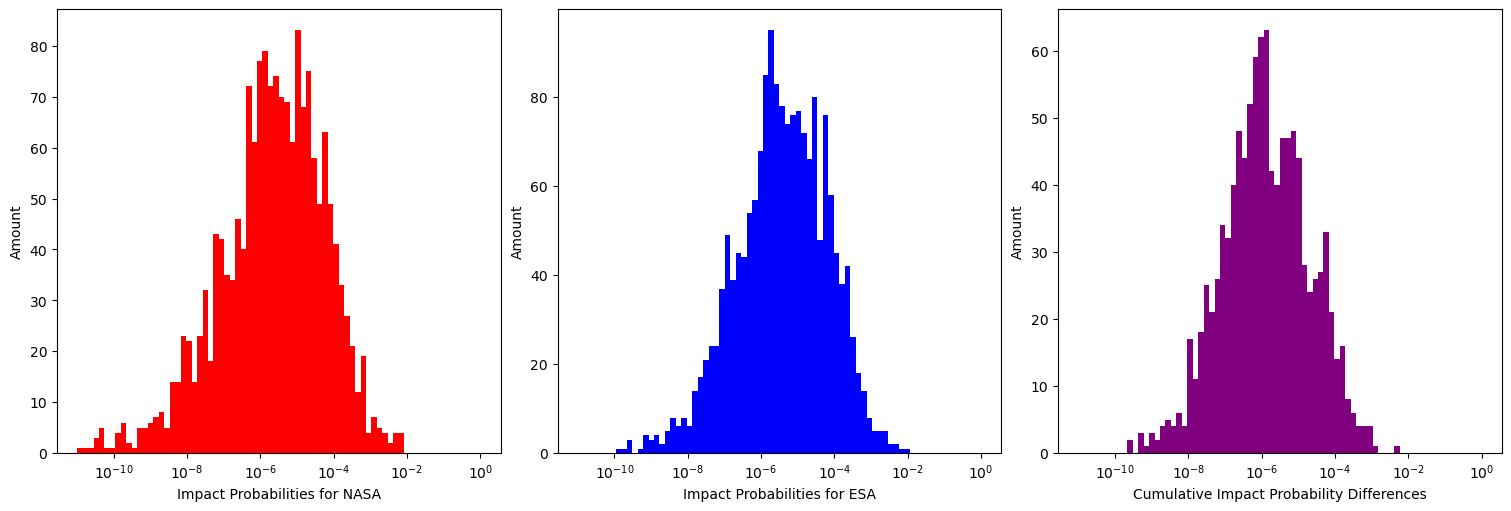

In [19]:

        fig, ax = plt.subplot_mosaic('''ABC''', figsize = (15,5), constrained_layout = True)

        my_bins = np.logspace(-11, 0, 75)

        ax['A'].set_xlabel("Impact Probabilities for NASA")
        ax['A'].set_ylabel("Amount")
        ax['B'].set_xlabel("Impact Probabilities for ESA")
        ax['B'].set_ylabel("Amount")
        ax['C'].set_xlabel("Cumulative Impact Probability Differences")
        ax['C'].set_ylabel("Amount")
        ax['A'].hist(asteroid_common_list['IP cum ESA'], bins = my_bins, histtype = "stepfilled", facecolor = "red")
        ax['B'].hist(asteroid_common_list['IP cum NASA'], bins = my_bins, histtype = "stepfilled", facecolor = "blue")
        ax['C'].hist(asteroid_common_list['IP cum difference'], bins = my_bins, histtype = "stepfilled", facecolor = "purple")

        ax['A'].set_xscale("log")
        ax['B'].set_xscale("log")
        ax['C'].set_xscale("log")


In [20]:
def plot_scatter(x, y, z, labels, xlog=0, ylog=1):
        
    fig, ax = plt.subplots(figsize=(9,4))

    scatter = ax.scatter(x, y, c=z, marker="o", cmap=ListedColormap(["navy", "gold"]))

    ax.set_xlabel(labels[0], 
                     fontfamily = 'serif',
                     fontsize = 15)
    ax.set_ylabel(labels[1], 
                     fontfamily = 'serif',
                     fontsize = 15)
    ax.set_title(labels[2], 
                     fontfamily = 'serif',
                     fontsize = 15)
    if xlog == 0:
        ax.set_xscale('log')
        
    if ylog == 0:
        ax.set_yscale('log')

    
    ax.tick_params(axis='both', which='major', labelsize = 12)

    cbar = plt.colorbar(scatter);
    cbar.set_ticks([1, 0])
    cbar.set_ticklabels(["NASA has max", "ESA has max"])
    
        # Returns the plot generated with these parameters
    
    plt.show();

    return scatter

In [21]:
labels_relative_ip = ['Cum IP (Maximum Between NASA and ESA)',
            'Relative IP Difference (Percentage)',
            'Cum IP vs Relative IP Difference']
labels_relative_ip_ratio = ['Cum IP (Maximum Between NASA and ESA)',
            'Relative IP Difference(Ratio)',
            'Cum IP vs Relative IP Difference']
labels_v_inf = ['Velocity at Infinity(km/s)',
               'Cumulative IP Ratio',
               'V_inf vs Cum IP Ratio']

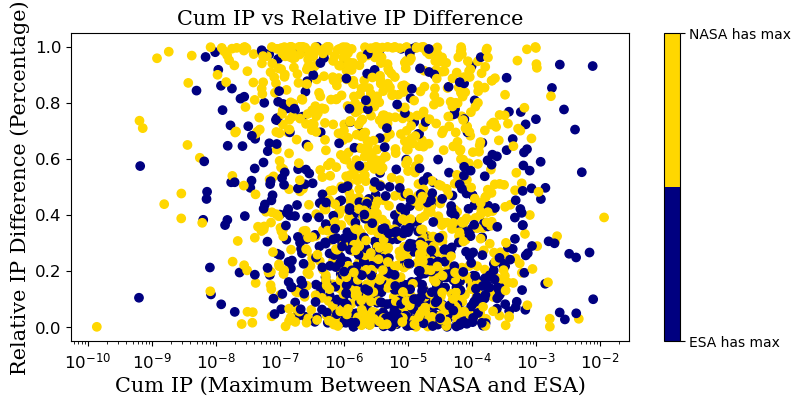

In [22]:
plot_scatter(asteroid_common_list['maximum cum IP'] , asteroid_common_list['relative cum IP'], asteroid_common_list['NASA has max?'], labels_relative_ip, 0, 1,)

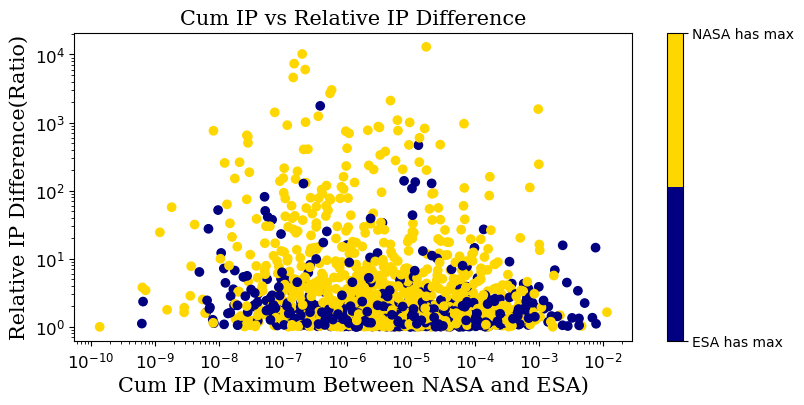

In [23]:
plot_scatter(asteroid_common_list['maximum cum IP'] , asteroid_common_list['cum IP ratio'], asteroid_common_list['NASA has max?'], labels_relative_ip_ratio, 0, 0)


In [24]:
high_ip_high_disagreement_w_ratio = (asteroid_common_list[(
    (800 < asteroid_common_list['cum IP ratio']) & (asteroid_common_list['cum IP ratio'] < 14000)
)])
high_ip_high_disagreement_w_ratio

Object Designation,v_inf,IP cum NASA,IP cum ESA,maximum cum IP,minimum cum IP,NASA has max?,IP cum difference,abs val IP cum difference,relative cum IP,cum IP ratio
str26,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64
2005AU3,14.4054013679866,1.64084499e-05,2e-08,1.64084499e-05,2e-08,1,1.63884499e-05,1.63884499e-05,0.9987811158200873,820.4224949999999
2010UB,7.99140107125467,6.161e-06,5.67e-09,6.161e-06,5.67e-09,1,6.15533e-06,6.15533e-06,0.9990796948547314,1086.5961199294534
2015JJ,10.69,6.751e-05,7.01e-08,6.751e-05,7.01e-08,1,6.74399e-05,6.74399e-05,0.998961635313287,963.0527817403708
2016HF3,7.93,9.568e-06,9.51e-09,9.568e-06,9.51e-09,1,9.558490000000001e-06,9.558490000000001e-06,0.9990060618729097,1006.0988433228181
2021HY9,10.27,4.803e-06,2.28e-09,4.803e-06,2.28e-09,1,4.800719999999999e-06,4.800719999999999e-06,0.999525296689569,2106.578947368421
2021LL15,10.1710772341984,3.0927815e-06,3.54e-09,3.0927815e-06,3.54e-09,1,3.0892415e-06,3.0892415e-06,0.9988553992579172,873.6670903954802
2021TS10,8.51546599211546,1.50421e-07,2.05e-11,1.50421e-07,2.05e-11,1,1.5040049999999998e-07,1.5040049999999998e-07,0.9998637158375492,7337.60975609756
2022BA7,9.27119798772169,1.1728e-07,1.28e-10,1.1728e-07,1.28e-10,1,1.17152e-07,1.17152e-07,0.9989085948158254,916.25
2022KM4,24.97,2.2638e-07,2.23e-10,2.2638e-07,2.23e-10,1,2.26157e-07,2.26157e-07,0.9990149306475837,1015.1569506726457


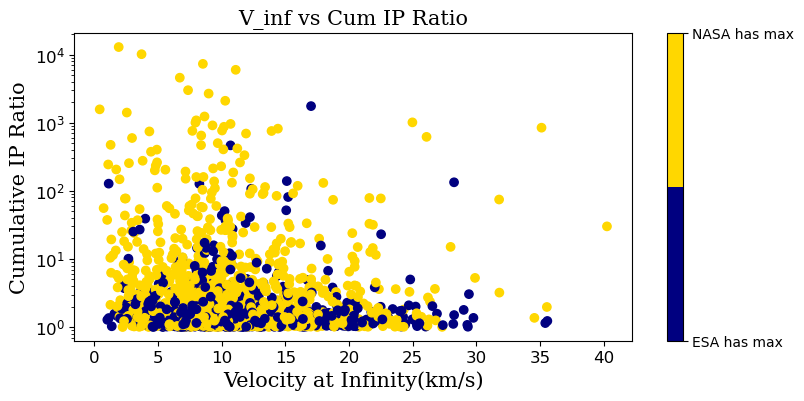

In [25]:
plot_scatter(asteroid_common_list['v_inf'] , asteroid_common_list['cum IP ratio'], asteroid_common_list['NASA has max?'], labels_v_inf, 1, 0)


In [26]:
def get_v_inf_and_ratio(max_ip, min_ip):
    v_inf_at_ip = asteroid_common_list['v_inf'][((asteroid_common_list['maximum cum IP'] > (min_ip)) &
                    (asteroid_common_list['maximum cum IP'] < (max_ip)))]
    ratio_at_ip = asteroid_common_list['cum IP ratio'][((asteroid_common_list['maximum cum IP'] > (min_ip)) &
                    (asteroid_common_list['maximum cum IP'] < (max_ip)))]
    who_max_at_ip = asteroid_common_list['NASA has max?'][((asteroid_common_list['maximum cum IP'] > (min_ip)) &
                    (asteroid_common_list['maximum cum IP'] < (max_ip)))]
    return (v_inf_at_ip, ratio_at_ip, who_max_at_ip)

In [27]:
max_ip_array = np.flip([(10 ** (-n)) for n in range(1, 5)])
max_ip_array[0]


np.float64(0.0001)

In [28]:
min_ip_array = np.flip([(10 ** (-n)) for n in range(2, 6)])
min_ip_array[0]

np.float64(1e-05)

In [29]:
v_inf_cum_ip, ratio_cum_ip, who_max_cum_ip = get_v_inf_and_ratio(max_ip_array[3], 0.0000001)

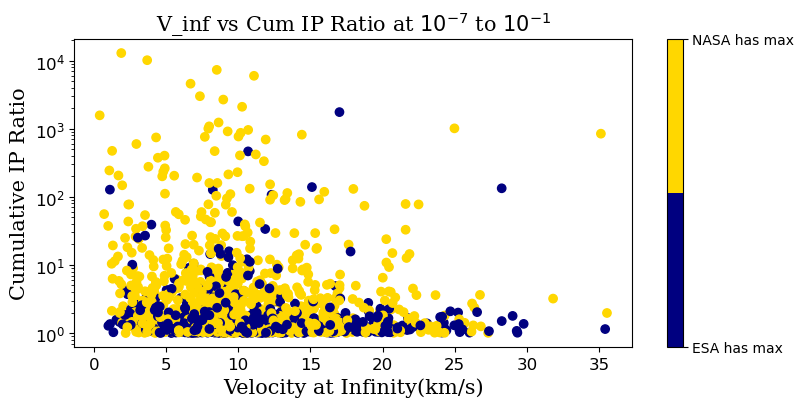

In [30]:
plot_scatter(v_inf_cum_ip, 
             ratio_cum_ip, who_max_cum_ip, 
             ['Velocity at Infinity(km/s)',
               'Cumulative IP Ratio',
               'V_inf vs Cum IP Ratio at $10^{-7}$ to $10^{-1}$'], 1, 0)

In [31]:
v_inf_cum_ip, ratio_cum_ip, who_max_cum_ip = get_v_inf_and_ratio(max_ip_array[0], min_ip_array[0])

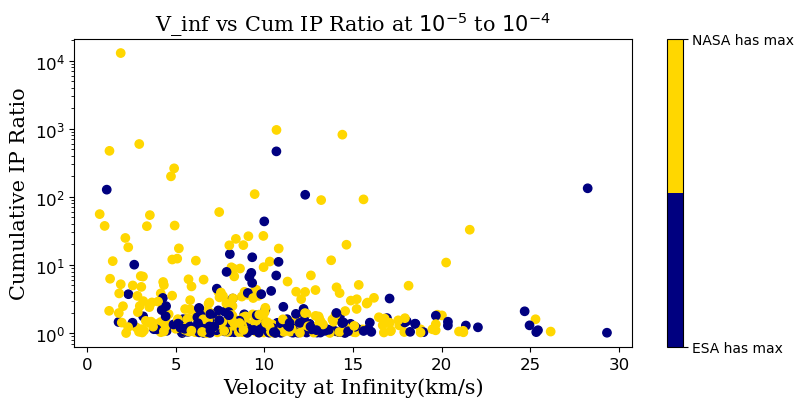

In [32]:
plot_scatter(v_inf_cum_ip, 
             ratio_cum_ip, who_max_cum_ip, 
             ['Velocity at Infinity(km/s)',
               'Cumulative IP Ratio',
               'V_inf vs Cum IP Ratio at $10^{-5}$ to $10^{-4}$'], 1, 0)

In [33]:
v_inf_cum_ip, ratio_cum_ip, who_max_cum_ip = get_v_inf_and_ratio(max_ip_array[1], min_ip_array[1])

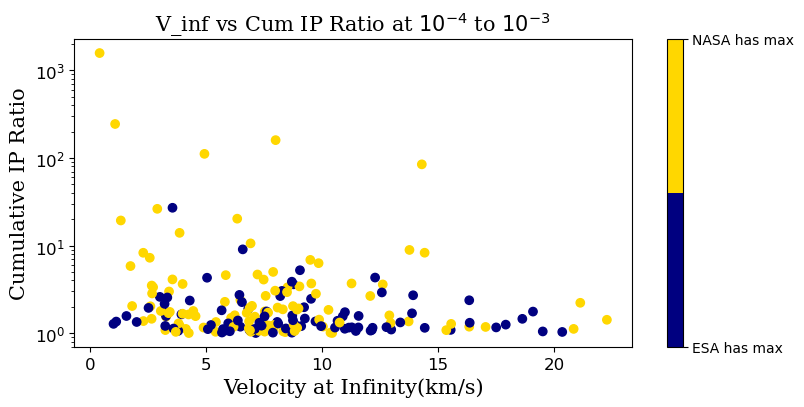

In [34]:
plot_scatter(v_inf_cum_ip, 
             ratio_cum_ip, who_max_cum_ip,
             ['Velocity at Infinity(km/s)',
               'Cumulative IP Ratio',
               'V_inf vs Cum IP Ratio at $10^{-4}$ to $10^{-3}$'], 1, 0)

In [35]:
v_inf_cum_ip, ratio_cum_ip, who_max_cum_ip = get_v_inf_and_ratio(max_ip_array[3], min_ip_array[2])

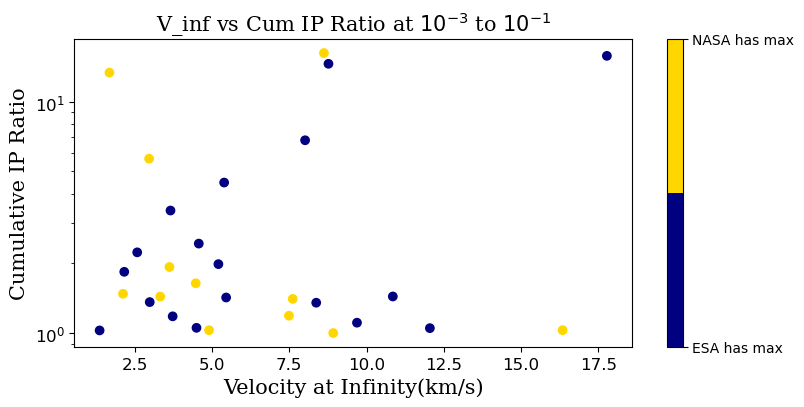

In [36]:
plot_scatter(v_inf_cum_ip, 
             ratio_cum_ip, who_max_cum_ip,
             ['Velocity at Infinity(km/s)',
               'Cumulative IP Ratio',
               'V_inf vs Cum IP Ratio at $10^{-3}$ to $10^{-1}$'], 1, 0)